In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv('../data/las-vegas_nv.csv', parse_dates=True, index_col='date').drop(columns=['city', 'state'])
df.sort_index(inplace=True)
df

,humidity (%),precipitation (in),avg_temp (°F),pressure (hPa),wind (mph)
date,,,,,
2021-01-01,57,0.0,47,1016,21
2021-01-02,31,0.0,46,1021,18
2021-01-03,36,0.0,45,1022,6
2021-01-04,36,0.0,47,1021,7
2021-01-05,32,0.0,50,1017,14
...,...,...,...,...,...
2024-03-08,49,0.0,57,1011,20
2024-03-09,20,0.0,54,1020,23
2024-03-10,27,0.0,55,1019,23


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1167 entries, 2021-01-01 to 2024-03-12
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   humidity (%)        1167 non-null   int64  
 1   precipitation (in)  1167 non-null   float64
 2   avg_temp (°F)       1167 non-null   int64  
 3   pressure (hPa)      1167 non-null   int64  
 4   wind (mph)          1167 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 54.7 KB


In [21]:
print(f"Max avg temp between 2021 and 2024 was {round(max(df.loc['2021-01-01':'2024-01-01', 'avg_temp (°F)']), 2)}°F")

Max avg temp between 2021 and 2024 was 105°F


In [19]:
print(f"Avg temp between 2021 and 2024 was {round(df.loc['2021-01-01':'2024-01-01', 'avg_temp (°F)'].mean(), 2)}°F")

Avg temp between 2021 and 2024 was 70.8°F


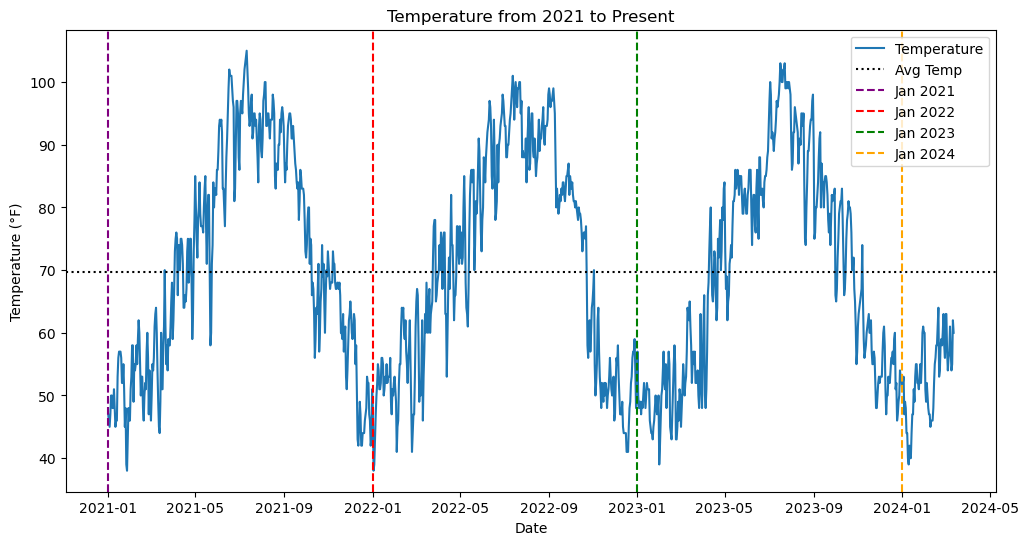

In [43]:
plt.figure(figsize=(12, 6))
sns.lineplot(df['avg_temp (°F)'], label='Temperature')
plt.axhline(df['avg_temp (°F)'].mean(), color='black', linestyle=':', label='Avg Temp')
plt.axvline(pd.to_datetime('2021-01-01'), color='purple', linestyle='--', label='Jan 2021')
plt.axvline(pd.to_datetime('2022-01-01'), color='red', linestyle='--', label='Jan 2022')
plt.axvline(pd.to_datetime('2023-01-01'), color='green', linestyle='--', label='Jan 2023')
plt.axvline(pd.to_datetime('2024-01-01'), color='orange', linestyle='--', label='Jan 2024')
plt.title('Temperature from 2021 to Present')
plt.ylabel('Temperature (°F)')
plt.xlabel('Date')
plt.legend();

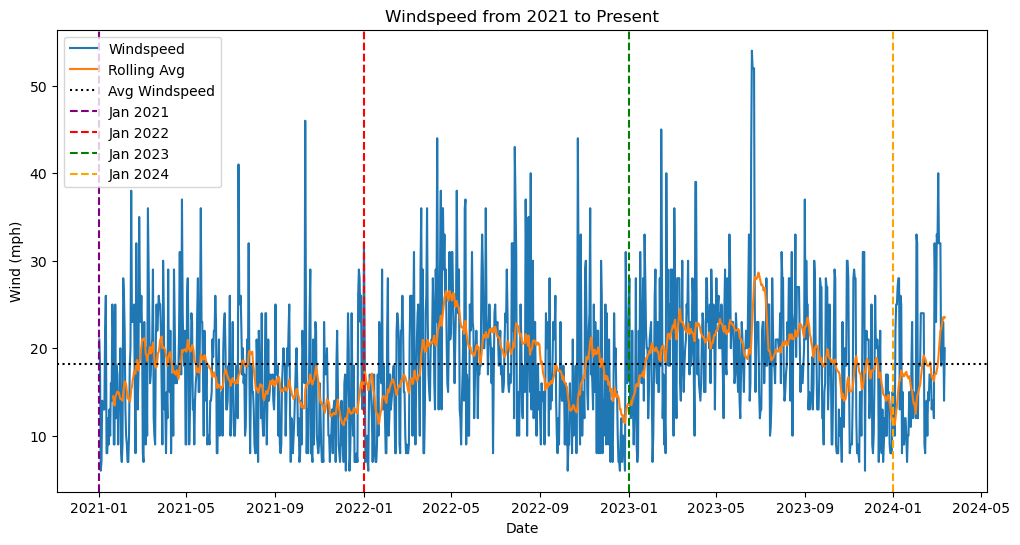

In [42]:
plt.figure(figsize=(12, 6))
sns.lineplot(df['wind (mph)'], label='Windspeed')
sns.lineplot(df["wind (mph)"].rolling(window=20).mean(), label='Rolling Avg')
plt.axhline(df['wind (mph)'].mean(), color='black', linestyle=':', label='Avg Windspeed')
plt.axvline(pd.to_datetime('2021-01-01'), color='purple', linestyle='--', label='Jan 2021')
plt.axvline(pd.to_datetime('2022-01-01'), color='red', linestyle='--', label='Jan 2022')
plt.axvline(pd.to_datetime('2023-01-01'), color='green', linestyle='--', label='Jan 2023')
plt.axvline(pd.to_datetime('2024-01-01'), color='orange', linestyle='--', label='Jan 2024')
plt.title('Windspeed from 2021 to Present')
plt.ylabel('Wind (mph)')
plt.xlabel('Date')
plt.legend();

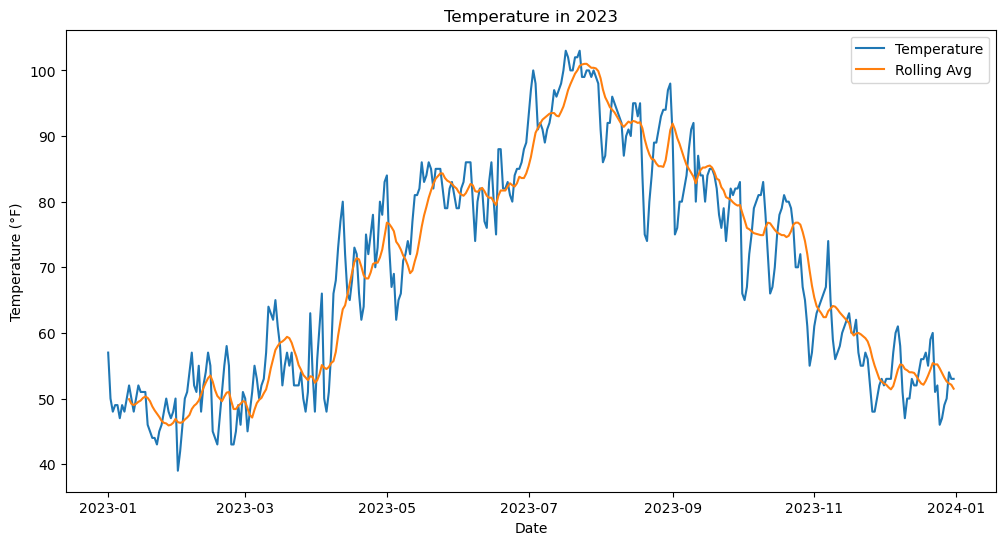

In [45]:
plt.figure(figsize=(12, 6))
sns.lineplot(df.loc['2023', 'avg_temp (°F)'], label='Temperature')
sns.lineplot(df.loc["2023", "avg_temp (°F)"].rolling(window=10).mean(), label='Rolling Avg')
plt.title('Temperature in 2023')
plt.ylabel('Temperature (°F)')
plt.xlabel('Date')
plt.legend();

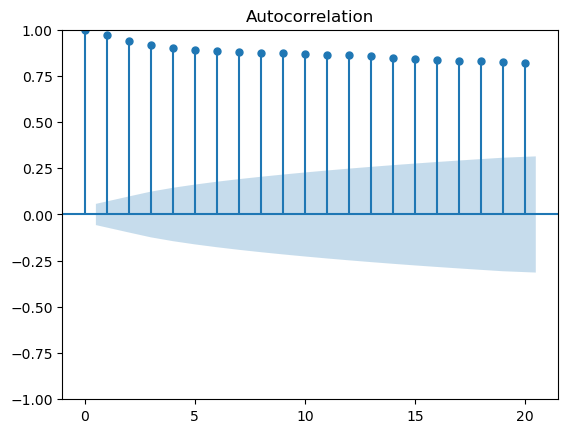

In [8]:
plot_acf(df['avg_temp (°F)'], lags=20);

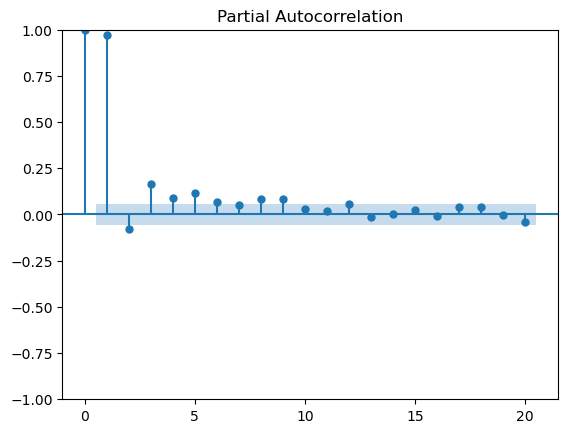

In [9]:
plot_pacf(df['avg_temp (°F)'], lags=20);

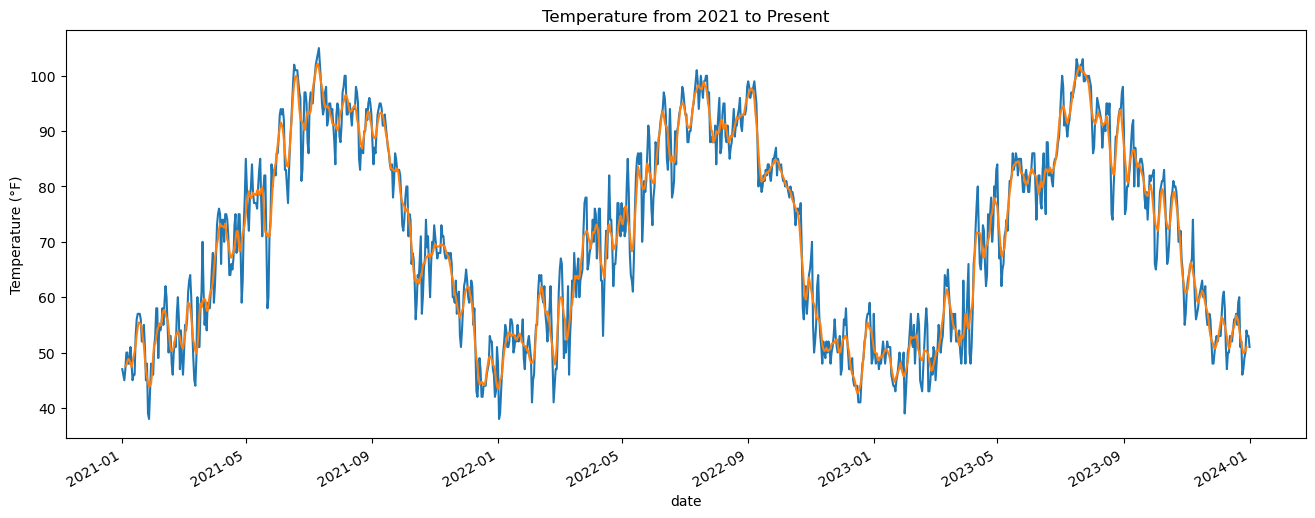

In [46]:
decomp = seasonal_decompose(df.loc['2021-01-01':'2024-01-01', 'avg_temp (°F)'])

plt.figure(figsize=(16, 6))
plt.plot(df.loc['2021-01-01':'2024-01-01', 'avg_temp (°F)'])
plt.title('Temperature from 2021 to Present')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
decomp.trend.plot();

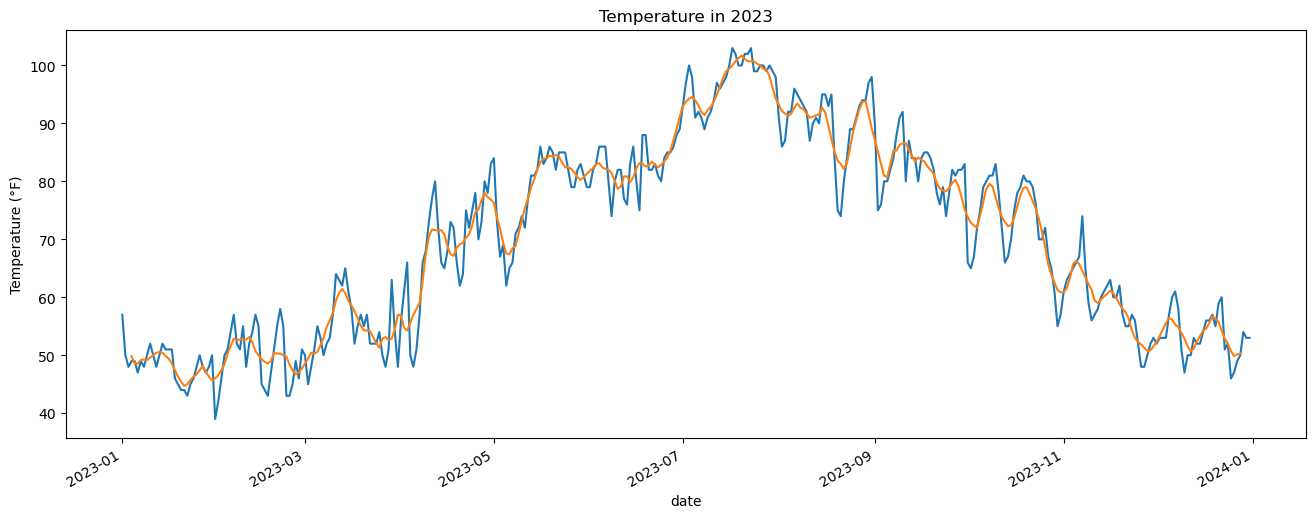

In [47]:
decomp = seasonal_decompose(df.loc['2023', 'avg_temp (°F)'])

plt.figure(figsize=(16, 6))
plt.plot(df.loc['2023', 'avg_temp (°F)'])
plt.title('Temperature in 2023')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
decomp.trend.plot();